# Tensorflow - Keras non Linear Regression

In [1]:
# Lets Import.

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.colors as colors # For plot colors.

import numpy as np

print('TF version: ', tf.__version__) # 2.10.1

TF version:  2.10.1


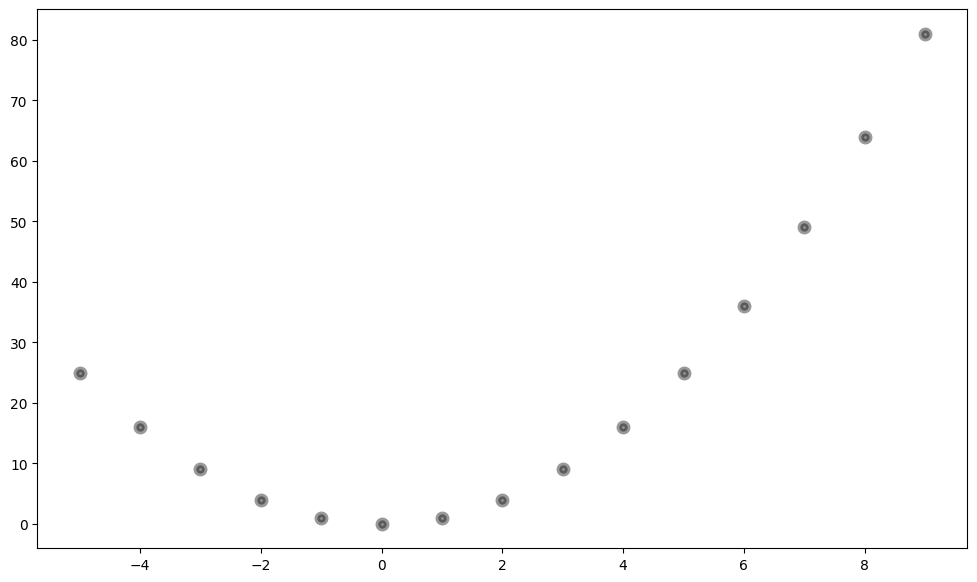

In [2]:
# Lets create second degree polynomial data.
# We will try to predict y values for every x value.

# The function which we looking for ax^2 + bx + c

x = tf.constant(tf.range(-5, 10, dtype = tf.float32))
y = tf.constant(x.numpy() ** 2, dtype = tf.float32)

plt.figure(figsize = (12,7))
plt.scatter(x.numpy(), y.numpy(), linewidth = 4,
           alpha = 0.4, color = 'black')
plt.show()

In [5]:
# Lets create Sequential model and add Layer.
# Note : You can also use functional API to create model.
# Via Sequential, layers will be stacked.

# Functional API give us the chance for create more complex models.
# Sequential API more easier to create simple models.

# Lets start with simple linear model.
# Because of the activation function ; model will be linear.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,)),
])

# We will use Mse loss and adam optimizer
model.compile(loss = 'mse', optimizer = 'adam')

# 1000 epochs for training.
model.fit(x.numpy(),y.numpy() , epochs = 100 , verbose = 0)
print('Training done')

test_number = 20

# If the model can learned, result should be close to the 400.
predict = model(tf.convert_to_tensor([[test_number]]))
print(f'{test_number} predict is : {predict}')

Training done
20 predict is : [[23.710743]]


Predict is not looking good. Lets see the plot 

1/1 [==============================] - 0s 36ms/step


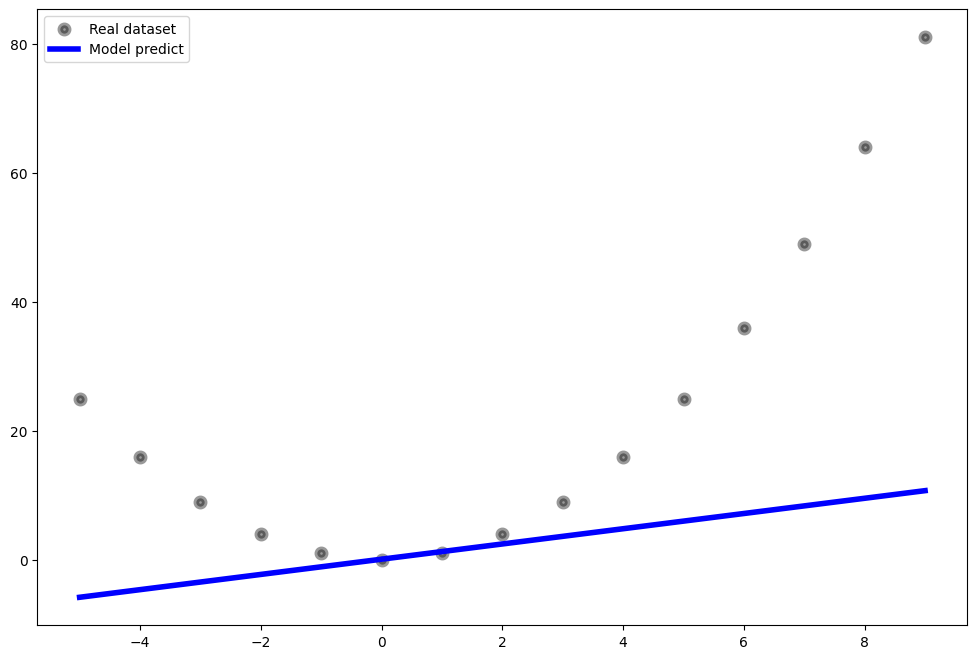

In [7]:
plt.figure(figsize=(12,8))

plt.scatter(x.numpy() , y.numpy(), linewidths=4,
            alpha = 0.4 , color = 'black',  label = 'Real dataset')

plt.plot(x.numpy() , model.predict(x.numpy()) , label = 'Model predict' , color = 'blue' , linewidth = 4)

plt.legend()
plt.show()

# Problem

The problem is output default activation function is linear. So model can learn only the linear data. 

We should use nonlinear and popular activations such as :

* Sigmoid
* ReLU
* Softmax
* Tanh
* Leaky ReLU
* Swish - SiLU

# Sigmoid Activation Function

We use sigmoid activation function at output layer most of time. Because sigmoid's value is between 0 and 1 so we can assume the output as a probability.

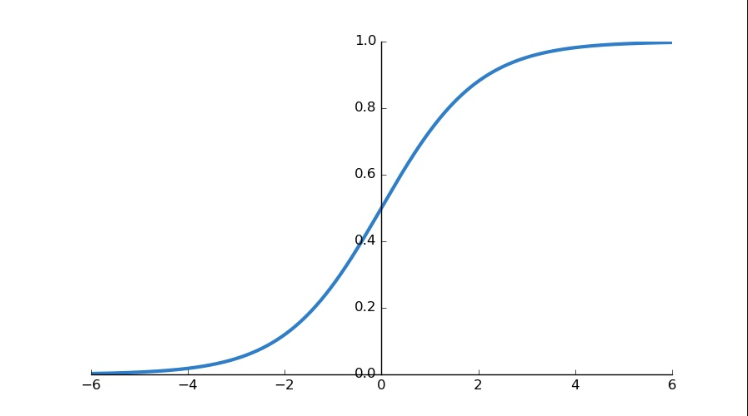

### We can't use sigmoid function at hidden layers because it result as a vanishing gradient problem...

## What's vanishing gradients ? 

The Vanishing Gradient Problem is a challenge when training models trained by gradient-based methods such as Deep Learning (for example, Backpropagation). This problem makes it difficult for previous layers in the model to learn and adjust their parameters. This problem becomes more problematic as the number of layers in the model increases.

This is actually not a Deep Learning based problem. As I mentioned above, it is a situation that arises as a result of the activation functions in gradient-based learning.

## Why it happens ? 

I should write this paragraph in Turkish. It's hard to explain it in English lol. (Maybe I'll change it later.)

Kaybolan gradyan problemi, aktivasyon fonksiyonunun seçimine bağlıdır. Birçok yaygın aktivasyon fonksiyonu (örneğin sigmoid veya tanh) girdilerini çok küçük bir çıktı aralığına çok doğrusal olmayan bir şekilde 'bastırır-sıkıştırır'. Örneğin, sigmoid, gerçek sayı doğrusunu [0, 1] aralığına eşler. Yani [0,1] arası değerler alır.

Bu tür doğrusal olmayan birden çok katmanı(modeldeki layerlar aktivasyon fonksiyonları alınca lineer olmaktan çıkarlar) üst üste yığdığımızda bu problem ortaya çıkmaya başlar. Örneğin, birinci katman, büyük bir girdi bölgesini daha küçük bir çıktı bölgesine eşler, bu ikinci katman tarafından daha da küçük bir bölgeye eşlenir, üçüncü katman tarafından daha da küçük bir bölgeye eşlenir. Sonuç olarak, ilk katmanın parametrelerinde büyük bir değişiklik bile çıktıyı fazla değiştirmez.

### Whats the Solution ?

We can choose a different activation function which is not compress the inputs 0-1. ReLU is a popular activation function. ReLU output is `max(0,input)`.

# ReLU(Rectified Linear Unit) Activation Function

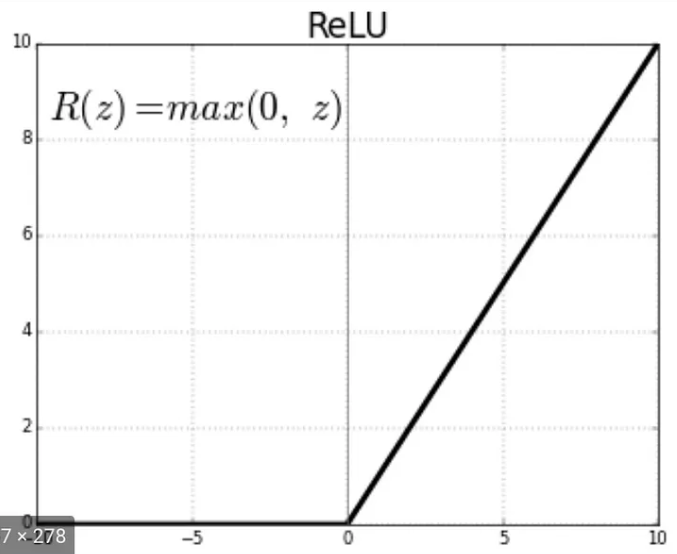

ReLU solve the vanishind gradients problem a little bit but there is another problem in ReLU : All negative values instantly become 0. This decrease the learning capability of our model. And it kills some neuron's learning capability.